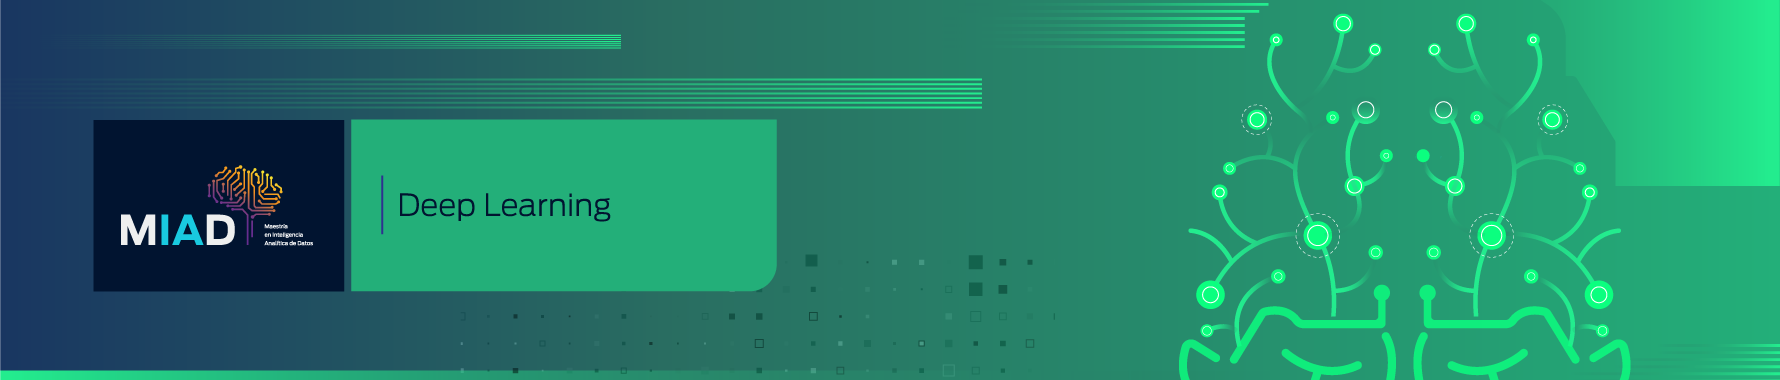

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [2]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

import seaborn as sns

#  Cargar datos

df = pd.read_csv("BankChurners.csv")

# Variable de respuesta (binaria)
# Existing Customer = 0
# Attrited Customer = 1

df["Attrition_Flag"] = df["Attrition_Flag"].map({
    "Existing Customer": 0,
    "Attrited Customer": 1
})


# Selección de variables continuas
variables_continuas = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"
]

df_analisis = df[variables_continuas + ["Attrition_Flag"]]

# Eliminación de observaciones con datos faltantes
df_analisis = df_analisis.dropna()





In [3]:
# Estadísticas descriptivas
estadisticas = df_analisis.describe()
print("=== Estadísticas descriptivas ===")
print(estadisticas)

=== Estadísticas descriptivas ===
       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3

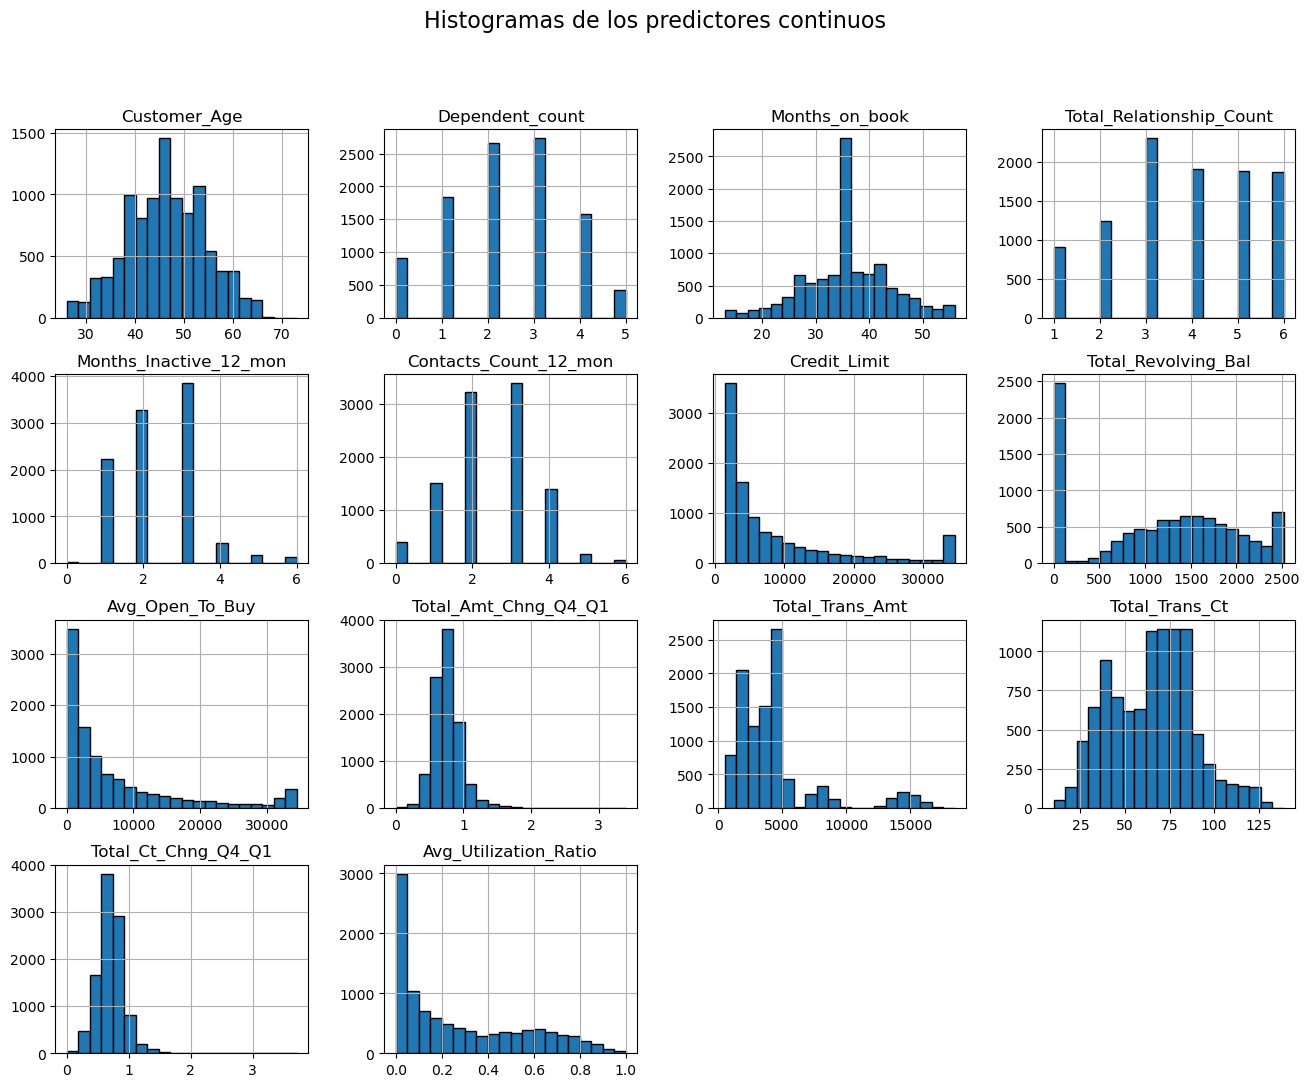

In [4]:

# Histogramas de variables continuas
df_analisis[variables_continuas].hist(
    figsize=(16, 12),
    bins=20,
    edgecolor="black"
)

plt.suptitle("Histogramas de los predictores continuos", fontsize=16)
plt.show()

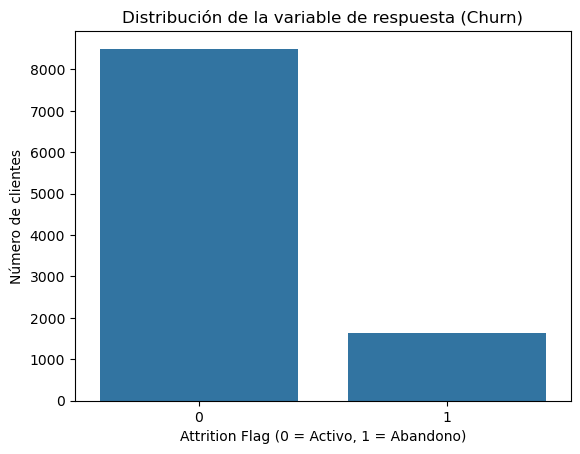

In [5]:

# Distribución de la variable de respuesta

sns.countplot(
    x="Attrition_Flag",
    data=df_analisis
)
plt.title("Distribución de la variable de respuesta (Churn)")
plt.xlabel("Attrition Flag (0 = Activo, 1 = Abandono)")
plt.ylabel("Número de clientes")
plt.show()

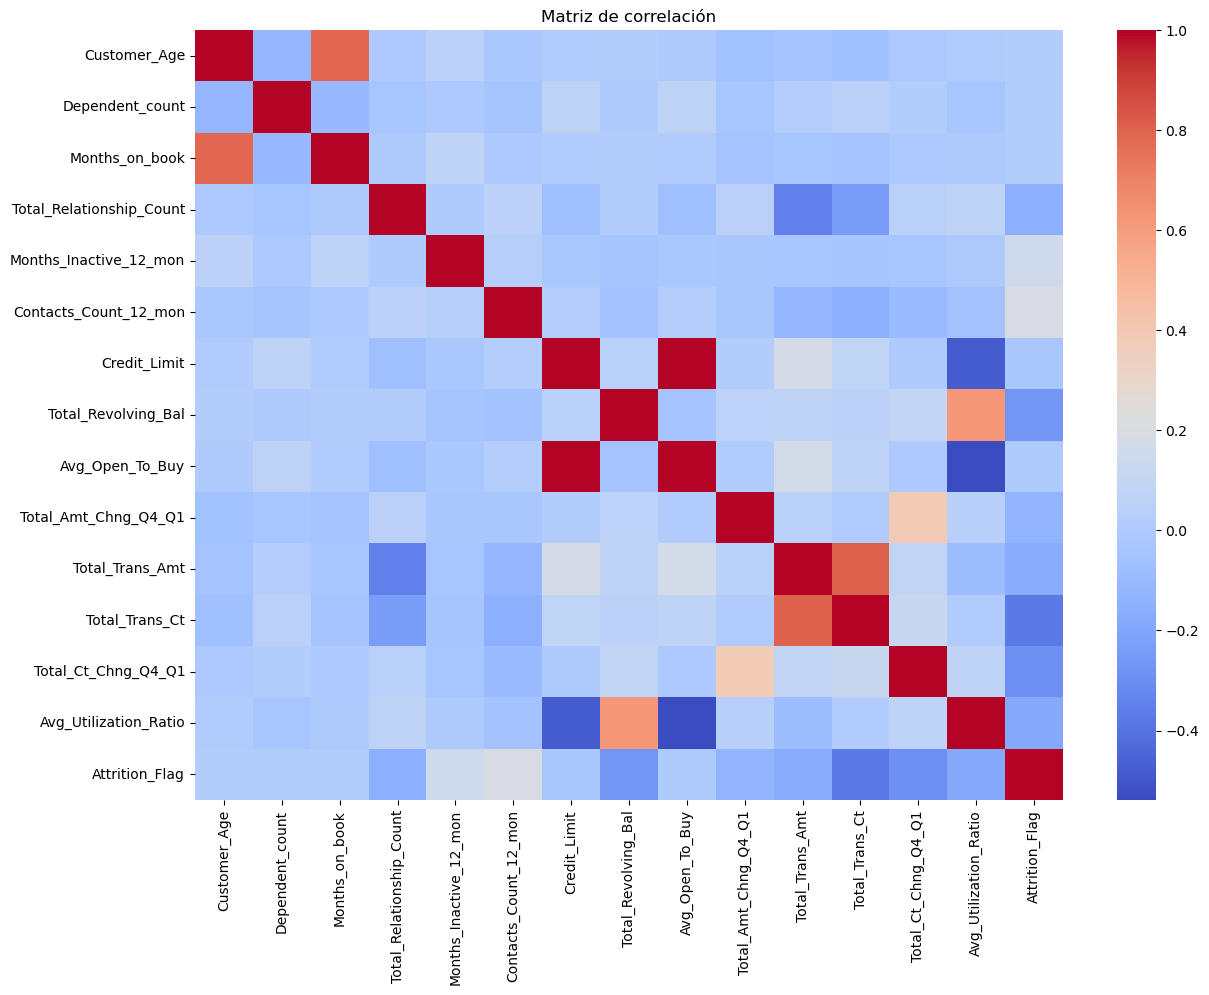

In [6]:

# Correlaciones
plt.figure(figsize=(14,10))
sns.heatmap(
    df_analisis.corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Matriz de correlación")
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

#### Procedimiento del análisis preliminar ####

Se descargó la base de datos Credit Card Customers (Bankchurners.csv) obtenida de Kaggle, la cual contiene información de aproximadamente 10.000 clientes de un banco. Como variable de respuesta se empleó Attrition Flag, que indica si el cliente abandonó o no el producto de tarjeta de crédito. Esta variable fue transformada a una representación binaria, asignando el valor 1 a los clientes que abandonaron (Attrited Customer) y 0 a los clientes activos (Existing Customer).

Se consideran únicamente variables continuas y se excluyen todas las variables categóricas. Posteriormente, se construyó un subconjunto de datos conformado por las variables numéricas seleccionadas y la variable de respuesta. Se eliminan observaciones con datos faltantes.

Se calcularon estadísticas descriptivas (media, desviación estándar, valores mínimos y máximos). Adicionalmente, se generaron histogramas para cada variable continua con el objetivo de analizar su distribución, detectar posibles asimetrías y presencia de valores extremos. Finalmente, se construyó un correlograma mediante la matriz de correlación de Pearson para identificar relaciones lineales entre los predictores y la variable de respuesta, así como posibles relaciones de multicolinealidad entre las variables explicativas.

 #### Análisis de resultados ####

Las estadísticas descriptivas muestran que las variables presentan escalas muy diferentes, por ejemplo, el límite de crédito y el monto total de transacciones toman valores considerablemente más altos que variables como la razón de utilización promedio o el cambio porcentual en el monto de transacciones. Esto sugiere que debemos hacer estandarización o normalización de los datos.

El análisis de los histogramas nos muestra que varias variables presentan distribuciones asimétricas, especialmente aquellas asociadas al comportamiento transaccional, como el monto total de transacciones y el número total de transacciones. Asimismo, algunas variables muestran concentraciones en algunos rangos, lo cual muestra patrones de comportamiento similares entre grupos de clientes.

En cuanto a la variable de respuesta, se observa una mayor cantidad de clientes activos frente a clientes que abandonan la tarjeta de crédito. 

El correlograma revela correlaciones significativas entre algunas variables: el número total de transacciones y el monto total de transacciones, así como entre el límite de crédito y el saldo disponible. Estas relaciones sugieren la presencia de información redundante entre ciertos predictores. En general, se identifican correlaciones moderadas entre algunos predictores y la variable de abandono, lo que indica que el fenómeno de churn no depende de una sola variable, sino de una combinación de factores.

#### Conclusiones ####
 Se evidenció la necesidad de realizar un preprocesamiento adecuado, especialmente en términos de escalamiento de variables, antes de implementar modelos de aprendizaje automático.

Asimismo, el análisis exploratorio sugiere que el abandono de clientes es un fenómeno complejo, influenciado principalmente por variables asociadas al uso y actividad de la tarjeta de crédito. 



### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

In [7]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Construcción de X (predictores) e y (respuesta)

X = df_analisis[variables_continuas].values
y = df_analisis["Attrition_Flag"].values

# Separación Train/Test (estratificada por clase)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Escalamiento

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)


#  Arquitectura
tf.random.set_seed(42)

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_sc.shape[1],)),
    BatchNormalization(),
    Dropout(0.20),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.20),

    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)


# Entrenamiento (con EarlyStopping)

early_stop = EarlyStopping(
    monitor="val_auc",
    mode="max",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_sc, y_train,
    validation_split=0.20,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)




Epoch 1/100


/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-06 21:51:08.235883: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2026-02-06 21:51:08.235915: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2026-02-06 21:51:08.235919: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 14.04 GB
2026-02-06 21:51:08.235948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-06 21:51:08.235956: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] C

203/203 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7449 - auc: 0.8023 - loss: 0.5294 - val_accuracy: 0.8957 - val_auc: 0.9138 - val_loss: 0.3298
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8670 - auc: 0.8644 - loss: 0.3308 - val_accuracy: 0.9031 - val_auc: 0.9185 - val_loss: 0.2568
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8838 - auc: 0.8849 - loss: 0.2861 - val_accuracy: 0.8982 - val_auc: 0.9198 - val_loss: 0.2455
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8853 - auc: 0.8884 - loss: 0.2793 - val_accuracy: 0.9025 - val_auc: 0.9199 - val_loss: 0.2421
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8881 - auc: 0.8875 - loss: 0.2778 - val_accuracy: 0.8994 - val_auc: 0.9211 - val_loss: 0.2437
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8864 - auc: 0.8940 - loss: 0.2721 - val_accuracy: 0.8994 - val_auc: 0.9200 - val_loss: 0.2446
Epoch 7/100
203/203 ━━━━━━━━━━━━━━━━━━━━

In [8]:
# Evaluación en TEST

test_loss, test_acc, test_auc = model.evaluate(X_test_sc, y_test, verbose=0)
print("\n=== Métricas en TEST ===")
print(f"Loss:     {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")
print(f"AUC:      {test_auc:.4f}")

# Probabilidades y predicción binaria (umbral 0.5)
y_prob = model.predict(X_test_sc, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("\n=== ROC AUC (sklearn) ===")
print(f"roc_auc: {roc_auc_score(y_test, y_prob):.4f}")

print("\n=== Classification Report (TEST) ===")
print(classification_report(y_test, y_pred, digits=4))

print("\n=== Confusion Matrix (TEST) ===")
print(confusion_matrix(y_test, y_pred))


=== Métricas en TEST ===
Loss:     0.2592
Accuracy: 0.8934
AUC:      0.9052

=== ROC AUC (sklearn) ===
roc_auc: 0.9054

=== Classification Report (TEST) ===
              precision    recall  f1-score   support

           0     0.9033    0.9777    0.9390      1701
           1     0.7946    0.4523    0.5765       325

    accuracy                         0.8934      2026
   macro avg     0.8490    0.7150    0.7577      2026
weighted avg     0.8859    0.8934    0.8809      2026


=== Confusion Matrix (TEST) ===
[[1663   38]
 [ 178  147]]


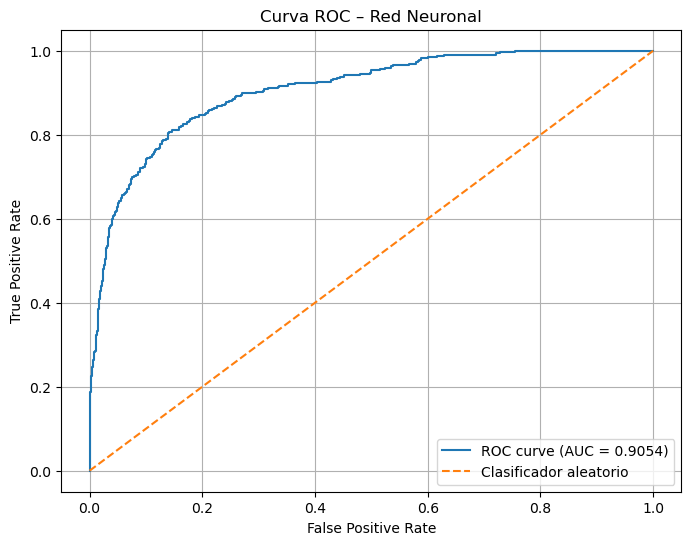

In [9]:

# CURVA ROC – AUC


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Clasificador aleatorio")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – Red Neuronal")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()


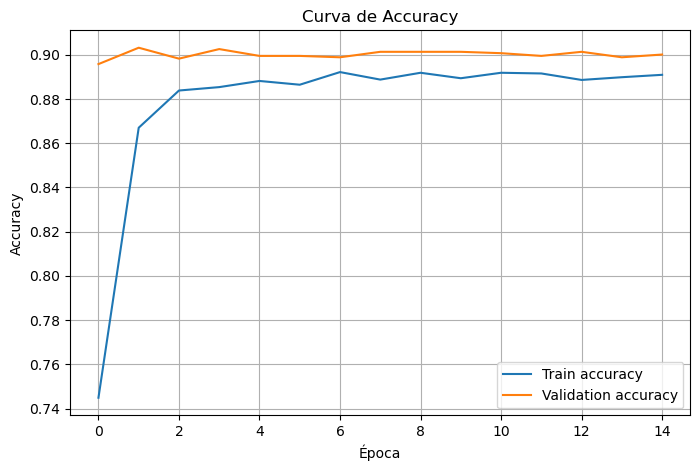

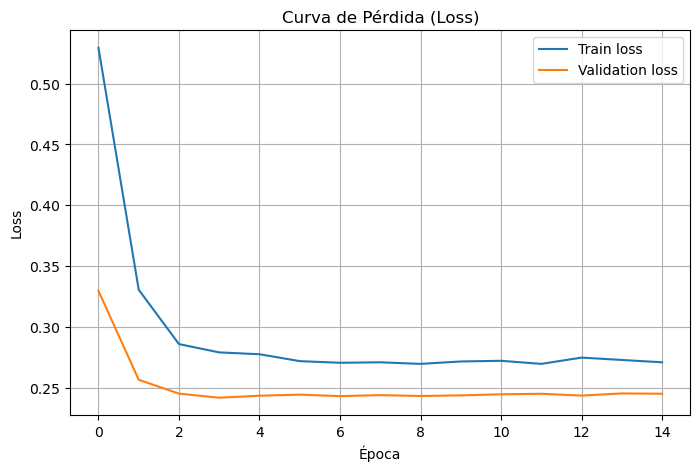

In [10]:

# CURVAS DE APRENDIZAJE: ACCURACY y LOSS (Train vs Validation)


import matplotlib.pyplot as plt

# --- Accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Curva de Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# --- Loss ---
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Curva de Pérdida (Loss)")
plt.legend()
plt.grid(True)
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)
#### Procedimiento de estimación del modelo ####  

Para la estimación del modelo predictivo se utilizó una red neuronal con la librería Keras, empleando solamente las variables continuas. Se eliminaron las observaciones con valores faltantes y se definió la variable de respuesta binaria Attrition Flag, donde el valor 1 representa a los clientes que abandonaron la tarjeta de crédito y el valor 0 a los clientes activos.

El conjunto de datos fue dividido en una muestra de entrenamiento (80 %) y una muestra de prueba (20 %). Las variables predictoras fueron estandarizadas mediante StandardScaler, utilizando únicamente la información de la muestra de entrenamiento.

La arquitectura de la red neuronal se definió como un modelo secuencial con dos capas ocultas densas, de 64 y 32 neuronas respectivamente, ambas con función de activación ReLU. Con el fin de mejorar la estabilidad del entrenamiento y reducir el riesgo de sobreajuste, se incorporaron capas de Batch Normalization y Dropout con una tasa del 20 %. La capa de salida se configuró con una sola neurona y función de activación sigmoide, apropiada para problemas de clasificación binaria.

El modelo fue entrenado utilizando el optimizador Adam, una función de pérdida de entropía cruzada binaria, y como métricas de desempeño se consideraron la exactitud (accuracy) y el área bajo la curva ROC (AUC). Adicionalmente, se implementó un criterio de Early Stopping, para detener el entrenamiento cuando no se observaran mejoras significativas y así evitar el sobreajuste.

#### Análisis de resultados ####

Durante el proceso de entrenamiento se observa una rápida convergencia del modelo, con mejoras sustanciales en las métricas de desempeño en las primeras épocas. La AUC en el conjunto de validación alcanza valores cercanos a 0.92, lo que indica una adecuada capacidad discriminatoria del modelo.

En la evaluación sobre el conjunto de prueba, el modelo obtuvo una exactitud del 89.24 % y un AUC de 0.905, confirmando un buen desempeño predictivo fuera de la muestra de entrenamiento. Estos resultados sugieren que la red neuronal es capaz de predecir adecuadamente.

Para la clase mayoritaria (clientes activos), el modelo presenta valores altos de precisión y recall, mientras que para la clase minoritaria (clientes que abandonan) el recall es moderado. Esto indica que, aunque el modelo identifica correctamente una proporción importante de clientes que abandonan, todavía existe un número considerable de falsos negativos, es decir, clientes que abandonan y son clasificados como activos.

La matriz de confusión confirma este hallazgo, mostrando que el modelo tiende a favorecer la clasificación de la clase mayoritaria, debido a la desbalanceada distribución de clases presente en el conjunto de datos. No obstante, el valor elevado del AUC evidencia que el modelo mantiene una buena capacidad de discriminación global.

#### Conclusiones ####

La red neuronal propuesta demostró ser una herramienta efectiva para la predicción del abandono de clientes de tarjetas de crédito, alcanzando un desempeño satisfactorio tanto en términos de exactitud como de AUC en el conjunto de prueba. El uso de técnicas de regularización y de parada temprana permitió controlar el sobreajuste y mejorar la capacidad de generalización del modelo.

Los resultados sugieren que el abandono de clientes está asociado a patrones no lineales en las variables de comportamiento transaccional, lo que justifica el uso de modelos de aprendizaje profundo. Sin embargo, el desempeño relativamente menor en la identificación de clientes que abandonan indica que fse podría mejorar con el uso de técnicas para el manejo del desbalance de clases o el ajuste del umbral de decisión.



### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

In [13]:
# Ejecución  

import numpy as np
import pandas as pd
import itertools
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score


#  FUNCIÓN PARA CONSTRUIR EL MODELO

def build_keras_mlp(input_dim, neurons, activations,
                    dropout=0.2, use_batchnorm=True, lr=1e-3):

    if len(neurons) != len(activations):
        raise ValueError("neurons y activations deben tener la misma longitud")

    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    for n, act in zip(neurons, activations):
        model.add(Dense(n, activation=act))
        if use_batchnorm:
            model.add(BatchNormalization())
        if dropout > 0:
            model.add(Dropout(dropout))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
    )

    return model


#  FUNCIÓN DE BÚSQUEDA DE HIPERPARÁMETROS

def grid_search_keras(
    X_train, y_train, X_test, y_test,
    layers_list,
    activations_list,
    dropout_list=(0.2,),
    lr_list=(1e-3,),
    batchnorm_list=(True,),
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    patience=10,
    random_seed=42
):

    tf.random.set_seed(random_seed)
    results = []

    combinations = list(itertools.product(
        layers_list, activations_list, dropout_list, lr_list, batchnorm_list
    ))

    for neurons, acts, dropout, lr, use_bn in combinations:

        # Validar compatibilidad
        if len(neurons) != len(acts):
            continue

        model = build_keras_mlp(
            input_dim=X_train.shape[1],
            neurons=neurons,
            activations=acts,
            dropout=dropout,
            use_batchnorm=use_bn,
            lr=lr
        )

        early_stop = EarlyStopping(
            monitor="val_auc",
            mode="max",
            patience=patience,
            restore_best_weights=True
        )

        history = model.fit(
            X_train, y_train,
            validation_split=validation_split,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stop],
            verbose=0
        )

        # Métricas validación
        val_auc = history.history["val_auc"][-1]
        val_acc = history.history["val_accuracy"][-1]

        # Evaluación en test
        _, test_acc, test_auc = model.evaluate(X_test, y_test, verbose=0)

        results.append({
            "neurons": neurons,
            "activations": acts,
            "dropout": dropout,
            "learning_rate": lr,
            "batchnorm": use_bn,
            "epochs_ran": len(history.history["loss"]),
            "val_auc": val_auc,
            "val_accuracy": val_acc,
            "test_auc": test_auc,
            "test_accuracy": test_acc
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values("test_auc", ascending=False).reset_index(drop=True)

    best_model = results_df.iloc[0]

    return results_df, best_model



In [15]:
layers_list = [
    [64],
    [64, 32],
    [128, 64]
]

activations_list = [
    ["relu"],
    ["relu", "relu"]
]

dropout_list = (0.0, 0.2)
lr_list = (1e-3,)
batchnorm_list = (True,)

results_df, best_config = grid_search_keras(
    X_train_sc, y_train,
    X_test_sc, y_test,
    layers_list=layers_list,
    activations_list=activations_list,
    dropout_list=dropout_list,
    lr_list=lr_list,
    batchnorm_list=batchnorm_list,
    epochs=60,
    batch_size=32,
    patience=10
)

print("=== TOP 5 combinaciones por AUC en test ===")
print(results_df.head())

print("\n=== Mejor configuración encontrada ===")
print(best_config)

=== TOP 5 combinaciones por AUC en test ===
     neurons   activations  dropout  learning_rate  batchnorm  epochs_ran  \
0       [64]        [relu]      0.0          0.001       True          13   
1  [128, 64]  [relu, relu]      0.0          0.001       True          40   
2       [64]        [relu]      0.2          0.001       True          14   
3  [128, 64]  [relu, relu]      0.2          0.001       True          44   
4   [64, 32]  [relu, relu]      0.0          0.001       True          14   

    val_auc  val_accuracy  test_auc  test_accuracy  
0  0.922917      0.904997  0.907946       0.896841  
1  0.923290      0.901295  0.907911       0.893386  
2  0.921206      0.902529  0.907634       0.897335  
3  0.922900      0.898828  0.907218       0.892399  
4  0.921428      0.904380  0.906223       0.897828  

=== Mejor configuración encontrada ===
neurons              [64]
activations        [relu]
dropout               0.0
learning_rate       0.001
batchnorm            True
epoch

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)


#### Procedimiento para la selección de hiperparámetros ####

Para la selección de hiperparámetros se implementó una función personalizada que evaluó diferentes arquitecturas de redes neuronales, variando el número de capas ocultas, el número de neuronas por capa, las funciones de activación, la tasa de dropout y la tasa de aprendizaje del optimizador.

Cada combinación fue entrenada utilizando la muestra de entrenamiento, incorporando una partición interna de validación y aplicando un criterio de Early Stopping basado en la métrica AUC de validación. Este mecanismo permitió detener el entrenamiento cuando no se observaban mejoras significativas en la capacidad discriminatoria del modelo, evitando así el sobreajuste y reduciendo el costo computacional.

Una vez entrenado cada modelo, se evaluó su desempeño sobre la muestra de prueba, registrando métricas de exactitud (accuracy) y área bajo la curva ROC (AUC). Como criterio principal para la comparación y selección del modelo final se utilizó la AUC en el conjunto de prueba.

#### Análisis de resultados ####

Los resultados de la búsqueda de hiperparámetros muestran que varias configuraciones alcanzan valores de AUC en prueba cercanos a 0.91, lo que indica una capacidad discriminatoria consistente entre diferentes arquitecturas. Sin embargo, la mejor combinación corresponde a una red neuronal con una sola capa oculta de 64 neuronas, función de activación ReLU, sin dropout, tasa de aprendizaje de 0.001 y uso de Batch Normalization.

Esta configuración alcanzó un AUC en prueba de 0.9079, el valor más alto entre todas las combinaciones evaluadas, así como una exactitud del 89.68 %. También, presenta un desempeño estable entre entrenamiento, validación y prueba, con un AUC de validación de 0.9229.

Al comparar esta arquitectura con modelos más complejos, como aquellos con dos capas ocultas (por ejemplo, [128, 64]), se observa que el incremento en complejidad no genera mejoras sustanciales en la métrica AUC.

Asimismo, el efecto del dropout no resultó determinante en este conjunto de datos, dado que las configuraciones con y sin dropout presentan desempeños muy similares. En particular, la arquitectura seleccionada alcanza su máximo desempeño en pocas épocas de entrenamiento, lo cual nos conduce a que el modelo no está sobreajustando y que la complejidad adicional no aporta mayores beneficios.

#### Conclusiones y justificación de la selección óptima ####

La selección óptima de hiperparámetros se fundamenta en  maximizar la capacidad de discriminación del modelo medida a través del AUC en el conjunto de prueba, garantizando al mismo tiempo una adecuada generalización. Con este vriterio, la arquitectura con una capa oculta de 64 neuronas y activación ReLU resultó ser la mejor alternativa.

Además del desempeño predictivo, la selección se justifica debido a que el modelo elegido logra resultados iguales o  mejores que arquitecturas más profundas con un menos parámetros y un menor costo computacional. Así se reduce el riesgo de sobreajuste y facilita su implementación.

En conclusión, la arquitectura seleccionada representa un balance adecuado entre desempeño, estabilidad y complejidad.